<a href="https://colab.research.google.com/github/Thayane25/PLN/blob/main/RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neurais em Processamento de Linguagem Natural

In [26]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print("Importação de bibliotecas bem sucedida!")

Importação de bibliotecas bem sucedida!


In [27]:
# Conjunto de dados de treinamento (pequeno e simplificado)
textos_treinamento = [
    "eu gosto de programar em python",
    "python é uma linguagem poderosa",
    "programar é divertido com python",
    "aprenda python e seja feliz",
    "gosto de aprender coisas novas"
]
print(f"Textos de treinamento: {textos_treinamento}")

Textos de treinamento: ['eu gosto de programar em python', 'python é uma linguagem poderosa', 'programar é divertido com python', 'aprenda python e seja feliz', 'gosto de aprender coisas novas']


In [28]:
# Inicializar o Tokenizer
tokenizer = Tokenizer()

# Construir o vocabulário a partir dos textos
tokenizer.fit_on_texts(textos_treinamento)

# Converter textos em sequência de números
sequencias = tokenizer.texts_to_sequences(textos_treinamento)

# Imprimir o vocabulário e as sequências geradas
print(f"\nVocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequência numéricas dos textos: {sequencias}")

# Calcular o tamanho do vocabulário (+1 para incluir o 0 de padding)
total_palavras = len(tokenizer.word_index) + 1
print (f"Tamanho total do vocabulário: {total_palavras}")


Vocabulário (palavra: índice): {'python': 1, 'gosto': 2, 'de': 3, 'programar': 4, 'é': 5, 'eu': 6, 'em': 7, 'uma': 8, 'linguagem': 9, 'poderosa': 10, 'divertido': 11, 'com': 12, 'aprenda': 13, 'e': 14, 'seja': 15, 'feliz': 16, 'aprender': 17, 'coisas': 18, 'novas': 19}
Sequência numéricas dos textos: [[6, 2, 3, 4, 7, 1], [1, 5, 8, 9, 10], [4, 5, 11, 12, 1], [13, 1, 14, 15, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulário: 20


In [29]:
# Preparar entradas (x) e saídas (y) para a previsão da próxima palavra
# a entrada (x) será uma sequência de palavras, e a saída (y) será a palavra seguinte.
# Determinar o comprimento máximo das sequências para padding
max_comprimento = max(len(seq) for seq in sequencias)
print(f"\nComprimento máximo das sequências antes do padding: {max_comprimento}")

# Criar pares de entrada (sequência parcial) e saída (próxima palavra)
# Ex: "Eu gosto de programar" -> "em"
#     "gosto de programar em" -> "python"
entradas_X = []
saidas_y = []

for seq in sequencias:
    for i in range(1,len(seq)):
      entradas_X.append(seq[:i]) # A sequência até a palavra atual
      saidas_y.append(seq[i]) # A próxima palavra

print(f"Exemplo de entradas_X (parcial): {entradas_X[0:5]}")
print(f"Exemplo de saidas_y (parcial): {saidas_y[0:5]}")

# Padronizar o comprimento das sequências de entrada
# Todas as sequências de entrada precisam ter o mesmo comprimento para a RNN
entradas_X_padded = pad_sequences(entradas_X, maxlen=max_comprimento -1, padding='pre')
# O maxlen é 'max_comprimento -1' porque a saída 'y' é a última palavra, então X sempre terá 1 palavra a menos.

# Converter as saídas para o formato one-hot encoding
# Isso é necessário para a ccamada de saída da RNN (softmax)
saidas_y_one_hot = tf.keras.utils.to_categorical(saidas_y, num_classes=total_palavras)

print(f"\nExemplo de entradas_X_padded (após padding e truncagem): \n{entradas_X_padded[0:5]}")
print(f"Exemplo de saidas_y_one_hot (após on)")
print(f"Formato final das entradas (x): {entradas_X_padded.shape}")
print(f"Formato final das saídas (y): {saidas_y_one_hot.shape}")


Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas_X (parcial): [[6], [6, 2], [6, 2, 3], [6, 2, 3, 4], [6, 2, 3, 4, 7]]
Exemplo de saidas_y (parcial): [2, 3, 4, 7, 1]

Exemplo de entradas_X_padded (após padding e truncagem): 
[[0 0 0 0 6]
 [0 0 0 6 2]
 [0 0 6 2 3]
 [0 6 2 3 4]
 [6 2 3 4 7]]
Exemplo de saidas_y_one_hot (após on)
Formato final das entradas (x): (21, 5)
Formato final das saídas (y): (21, 20)


In [30]:
# 1. Definindo o modelo
# Definir a arquitetura do modelo RNN
modelo_rnn = Sequential()

# Camada de Embedding:
# total_palavras: tamanho do vocabulário
# 10: dimensão do vetor de embedding (quantas características queremos para cada palavra)
# input_length: comprimento das sequências de entrada (maxlen - 1)
modelo_rnn.add(Embedding(total_palavras, 10, input_length=entradas_X_padded.shape[1]))

# Camada SimpleRNN:
# 32: número de unidades (neurônios) na camada recorrente. Este é o tamanho do estado oculto.
modelo_rnn.add(SimpleRNN(32))

# Camada Densa de Saída:
# total_palavras: número de neurônios de saída (um para cada palavra no vocabulário)
# activation='softmax': função de ativação para probabilidade (soma 1 para todas as palavras)
modelo_rnn.add(Dense(total_palavras, activation='softmax'))

# Compilar o modelo
modelo_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Treinando o modelo
print("\nIniciando o treinamento do modelo RNN...")
modelo_rnn.fit(entradas_X_padded, saidas_y_one_hot, epochs=100, verbose=1)
    # epochs: quantas vezes o modelo verá todo o conjunto de dados
    # verbose: 1 para mostrar o progresso do treinamento
print("Treinamento concluído!")


Iniciando o treinamento do modelo RNN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 2.9947
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0476 - loss: 2.9873
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0952 - loss: 2.9800
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0952 - loss: 2.9728
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1429 - loss: 2.9655
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1905 - loss: 2.9582
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2381 - loss: 2.9509
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2381 - loss: 2.9434
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2381 - loss: 2.9357
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2857 - loss: 2.9279
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2857 - loss: 2.9198
Epoch 12/100
1/1 ━━━━━━━━━━━━━

In [32]:
# 1. Função de Previsão:
def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):
    """
    Prevê a próxima palavra dado um texto base.
    """
    # Converter o texto base para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([texto_base])[0]

    # Padronizar o comprimento da sequência de entrada (precisa ter o mesmo formato que o treinamento)
    # Atenção: max_seq_len deve ser o comprimento que as *entradas* foram pad_sequenciadas
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='pre')

    # Fazer a previsão
    previsao_probabilidades = modelo.predict(sequencia_padded, verbose=0)[0]

    # Obter o índice da palavra com a maior probabilidade
    indice_palavra_prevista = np.argmax(previsao_probabilidades)

    # Converter o índice de volta para a palavra
    for palavra, indice in tokenizer.word_index.items():
        if indice == indice_palavra_prevista:
            return palavra
    return None  # Caso a palavra não seja encontrada (improvável com o vocabulário ajustado)

# Comprimento de entrada esperado pelo modelo
# entradas_X_padded.shape[1] é o maxlen que usamos no pad_sequences para X
comprimento_entrada_modelo = entradas_X_padded.shape[1]

# Testar o modelo com novas frases
print("\n-- Testando o Modelo RNN --\n")

texto_teste_1 = "eu gosto de"
proxima_1 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_1)
print(f"Texto: '{texto_teste_1}' -> Próxima palavra prevista: '{proxima_1}'")

texto_teste_2 = "python é uma"
proxima_2 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_2)
print(f"Texto: '{texto_teste_2}' -> Próxima palavra prevista: '{proxima_2}'")

texto_teste_3 = "programar é divertido"
proxima_3 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_3)
print(f"Texto: '{texto_teste_3}' -> Próxima palavra prevista: '{proxima_3}'")

texto_teste_4 = "aprenda python e"
proxima_4 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_4)
print(f"Texto: '{texto_teste_4}' -> Próxima palavra prevista: '{proxima_4}'")

# Exemplo com palavra fora do vocabulário (ou sequência que o modelo nunca viu antes)
texto_teste_5 = "o sol brilha no"
# "sol" e "brilha" não estão no vocabulário
proxima_5 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_5)
print(f"Texto: '{texto_teste_5}' -> Próxima palavra prevista: '{proxima_5}' (Pode ser inesperada devido a palavras desconhecidas)")


-- Testando o Modelo RNN --

Texto: 'eu gosto de' -> Próxima palavra prevista: 'programar'
Texto: 'python é uma' -> Próxima palavra prevista: 'linguagem'
Texto: 'programar é divertido' -> Próxima palavra prevista: 'com'
Texto: 'aprenda python e' -> Próxima palavra prevista: 'seja'
Texto: 'o sol brilha no' -> Próxima palavra prevista: 'é' (Pode ser inesperada devido a palavras desconhecidas)


In [33]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [34]:
# 1. Definir o Conjunto de Dados (Frases e Rótulos) para análise de sentimentos
dados_sentimento = [
    ("este filme é ótimo e divertido", "positivo"),
    ("adorei muito, muito bom", "positivo"),
    ("foi uma ótima atuação dos atores", "positivo"),
    ("o roteiro é fraco e chato", "negativo"),
    ("não gostei do produto", "negativo"),
    ("uma perda de tempo", "negativo"),
    ("filme terrível, inacabável", "negativo"),
    ("atuação muito ruim", "negativo"),
    ("excelente serviço, muito eficiente", "positivo"),
    ("decepcionante", "negativo"),
    ("experiência mágica e fascinante", "positivo"),
    ("plano de viagem interessante", "positivo"),
    ("comprei várias vezes", "negativo"),
    ("interface é confusa e difícil", "negativo"),
    ("ótimo suporte, útil e rápido", "positivo"),
]

textos = [dado[0] for dado in dados_sentimento]
sentimentos = [dado[1] for dado in dados_sentimento]

print(f"Total de frases: {len(textos)}")
print(f"Exemplo de textos: {textos[:3]}")
print(f"Exemplo de sentimentos: {sentimentos[:3]}")

Total de frases: 15
Exemplo de textos: ['este filme é ótimo e divertido', 'adorei muito, muito bom', 'foi uma ótima atuação dos atores']
Exemplo de sentimentos: ['positivo', 'positivo', 'positivo']


In [35]:
# 2. Mapear Sentimentos para Números: converter "positivo" e "negativo" para 0 e 1.
mapeamento_sentimento = {'negativo': 0, 'positivo': 1}
rotulos_numericos = np.array([mapeamento_sentimento[s] for s in sentimentos])
print(f"\nSentimentos mapeados para números: {rotulos_numericos}")


Sentimentos mapeados para números: [1 1 1 0 0 0 0 0 1 0 1 1 0 0 1]


In [36]:
# 3. Tokenização do Texto
tokenizer = Tokenizer(num_words=None, oov_token="unk")
# num_words=None para pegar todo o vocabulário
# oov_token para palavras desconhecidas
tokenizer.fit_on_texts(textos)
sequences_numericas = tokenizer.texts_to_sequences(textos)

total_palavras_vocab = len(tokenizer.word_index) + 1  # +1 para o 0 de padding/OOV

print(f"\nVocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas das frases: {sequences_numericas}")
print(f"Tamanho total do vocabulário: {total_palavras_vocab}")

# 4. Padronizar o comprimento das sequências
# Encontrar o comprimento da frase mais longa para padronizar
max_len = max(len(s) for s in sequences_numericas)
print(f"\nComprimento máximo das sequências: {max_len}")

entradas_padded = pad_sequences(sequences_numericas, maxlen=max_len, padding='post')  # 'post' para adicionar zeros no final
print(f"Sequências após padding: \n{entradas_padded}")

# 5. Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    entradas_padded, rotulos_numericos, test_size=0.2, random_state=42, stratify=rotulos_numericos
)

print(f"\nShape de X_treino: {X_treino.shape}")
print(f"Shape de X_teste: {X_teste.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de y_teste: {y_teste.shape}")


Vocabulário (palavra: índice): {'unk': 1, 'e': 2, 'muito': 3, 'é': 4, 'filme': 5, 'ótimo': 6, 'uma': 7, 'atuação': 8, 'de': 9, 'este': 10, 'divertido': 11, 'adorei': 12, 'bom': 13, 'foi': 14, 'ótima': 15, 'dos': 16, 'atores': 17, 'o': 18, 'roteiro': 19, 'fraco': 20, 'chato': 21, 'não': 22, 'gostei': 23, 'do': 24, 'produto': 25, 'perda': 26, 'tempo': 27, 'terrível': 28, 'inacabável': 29, 'ruim': 30, 'excelente': 31, 'serviço': 32, 'eficiente': 33, 'decepcionante': 34, 'experiência': 35, 'mágica': 36, 'fascinante': 37, 'plano': 38, 'viagem': 39, 'interessante': 40, 'comprei': 41, 'várias': 42, 'vezes': 43, 'interface': 44, 'confusa': 45, 'difícil': 46, 'suporte': 47, 'útil': 48, 'rápido': 49}
Sequências numéricas das frases: [[10, 5, 4, 6, 2, 11], [12, 3, 3, 13], [14, 7, 15, 8, 16, 17], [18, 19, 4, 20, 2, 21], [22, 23, 24, 25], [7, 26, 9, 27], [5, 28, 29], [8, 3, 30], [31, 32, 3, 33], [34], [35, 36, 2, 37], [38, 9, 39, 40], [41, 42, 43], [44, 4, 45, 2, 46], [6, 47, 48, 2, 49]]
Tamanho t

In [37]:
# Definir a arquitetura do modelo LSTM
modelo_lstm = Sequential()

# Camada de Embedding: Converte os índices numéricos das palavras em vetores densos.
# total_palavras_vocab: tamanho do vocabulário
# 50: dimensão do vetor de embedding (pode ser ajustado)
# input_length: comprimento padronizado das sequências (max_len)
modelo_lstm.add(Embedding(total_palavras_vocab, 50, input_length=max_len))

# Camada LSTM:
# 64: número de unidades (neurônios) na camada LSTM. Define o tamanho do estado oculto e da célula de memória.
# dropout: Um tipo de regularização para evitar overfitting (descarta aleatoriamente neurônios durante o treinamento).
# recurrent_dropout: Dropout aplicado nas conexões recorrentes da LSTM.
modelo_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Camada Densa de Saída:
# 1: Um único neurônio de saída, pois é um problema de classificação binária (positivo/negativo).
# activation='sigmoid': Função de ativação para classificação binária (produz um valor entre 0 e 1).
modelo_lstm.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Treinar o modelo
print("\nIniciando o treinamento do modelo LSTM...")
historico = modelo_lstm.fit(
    X_treino, y_treino,
    epochs=50,  # Reduzi para 50 epochs para um treinamento mais rápido no exemplo. Pode ser aumentado.
    batch_size=2,  # Pequeno batch_size para dataset pequeno.
    validation_split=0.1,  # Usar 10% do treino para validação
    verbose=1
)
# epochs: número de vezes que o modelo verá todo o conjunto de dados de treinamento.
# batch_size: número de amostras por atualização de gradiente.
# validation_split: % dos dados de treino usados para validação durante o treinamento (opcional, mas bom para monitorar overfitting).
print("Treinamento concluído!")


Iniciando o treinamento do modelo LSTM...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.3847 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7403 - loss: 0.6900 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7194 - loss: 0.6894 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7111 - loss: 0.6874 - val_accuracy: 0.0000e+00 - val_loss: 0.6966
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8639 - loss: 0.6769 - val_accuracy: 0.0000e+00 - val_loss: 0.7010
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8847 - loss: 0.6742 - val_accuracy: 0.0000e+00 - val_loss: 0.7059
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9458 - loss: 0.6575 - val_accuracy: 0.0000e+00 - val_loss: 0.7158
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.00


Acurácia do modelo no conjunto de teste: 66.67%
Perda do modelo no conjunto de teste: 0.4038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

-- Relatório de Classificação --
              precision    recall  f1-score   support

    negativo       0.67      1.00      0.80         2
    positivo       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


-- Matriz de Confusão --


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


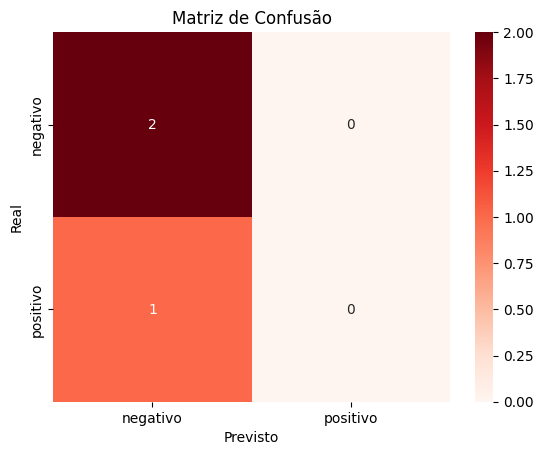

In [39]:
# Avalia o modelo no conjunto de teste
perda, acuracia = modelo_lstm.evaluate(X_teste, y_teste, verbose=0)
print(f"\nAcurácia do modelo no conjunto de teste: {acuracia*100:.2f}%")
print(f"Perda do modelo no conjunto de teste: {perda:.4f}")

# Fazer previsões no conjunto de teste
y_pred_prob = modelo_lstm.predict(X_teste)
y_pred_classes = (y_pred_prob > 0.5).astype(int)  # Converter probabilidades para 0 ou 1

print("\n-- Relatório de Classificação --")
print(classification_report(y_teste, y_pred_classes, target_names=['negativo', 'positivo']))

print("\n-- Matriz de Confusão --")
cm = confusion_matrix(y_teste, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['negativo', 'positivo'], yticklabels=['negativo', 'positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [40]:
# Utilizando o modelo treinado
def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimento):
    """
    Prevê o sentimento de uma nova frase.
    """
    # Converter a frase para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])

    # Se a frase tem palavras desconhecidas, o tokenizer pode retornar uma lista vazia ou valores 0
    if not sequencia_numerica:
        print(f"Aviso: a frase '{frase_nova}' contém apenas palavras desconhecidas.")
        return "Desconhecido"  # Ou outra indicação

    sequencia_numerica = sequencia_numerica[0]  # Pega a primeira (e única) sequência

    # Padronizar o comprimento da sequência de entrada
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='post')

    # Fazer a previsão (probabilidade)
    probabilidade_positiva = modelo.predict(sequencia_padded, verbose=0)[0][0]

    # Inverter o mapeamento para obter o nome do sentimento
    mapeamento_inverso = {v: k for k, v in mapeamento_sentimento.items()}

    # Classificar com base no limiar de 0.5
    if probabilidade_positiva >= 0.5:
        return mapeamento_inverso[1]  # 'positivo'
    else:
        return mapeamento_inverso[0]  # 'negativo'

# Testar o modelo com novas frases
print("\n-- Testando Modelo LSTM com Novas Frases ---")

frase_nova_1 = "gostei muito do filme, excelente!"
sentimento_1 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_1, mapeamento_sentimento)
print(f"Frase: '{frase_nova_1}' -> Sentimento previsto: '{sentimento_1}'")

frase_nova_2 = "odiei o livro, muito entediante"
sentimento_2 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_2, mapeamento_sentimento)
print(f"Frase: '{frase_nova_2}' -> Sentimento previsto: '{sentimento_2}'")

frase_nova_3 = "a aula de pln é ótima"
sentimento_3 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_3, mapeamento_sentimento)
print(f"Frase: '{frase_nova_3}' -> Sentimento previsto: '{sentimento_3}'")

frase_nova_4 = "o atendimento foi péssimo"
sentimento_4 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_4, mapeamento_sentimento)
print(f"Frase: '{frase_nova_4}' -> Sentimento previsto: '{sentimento_4}'")

frase_nova_5 = "esse produto não vale a pena, é caro"
sentimento_5 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_5, mapeamento_sentimento)
print(f"Frase: '{frase_nova_5}' -> Sentimento previsto: '{sentimento_5}'")

frase_nova_6 = "o filme é legal"  # Frase curta e ambígua para um modelo pequeno
sentimento_6 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_6, mapeamento_sentimento)
print(f"Frase: '{frase_nova_6}' -> Sentimento previsto: '{sentimento_6}'")

frase_nova_7 = "isso é horrível, que tristeza"
sentimento_7 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_7, mapeamento_sentimento)
print(f"Frase: '{frase_nova_7}' -> Sentimento previsto: '{sentimento_7}'")


-- Testando Modelo LSTM com Novas Frases ---
Frase: 'gostei muito do filme, excelente!' -> Sentimento previsto: 'negativo'
Frase: 'odiei o livro, muito entediante' -> Sentimento previsto: 'negativo'
Frase: 'a aula de pln é ótima' -> Sentimento previsto: 'positivo'
Frase: 'o atendimento foi péssimo' -> Sentimento previsto: 'negativo'
Frase: 'esse produto não vale a pena, é caro' -> Sentimento previsto: 'negativo'
Frase: 'o filme é legal' -> Sentimento previsto: 'negativo'
Frase: 'isso é horrível, que tristeza' -> Sentimento previsto: 'negativo'
